In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\pragy\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
print(df["sex"].value_counts())
# sns.countplot(x="sex",data=df)
# plt.show()

sex
male      676
female    662
Name: count, dtype: int64


In [5]:
df["smoker"].value_counts()
# sns.countplot(x="smoker",data=df)
# plt.show()

smoker
no     1064
yes     274
Name: count, dtype: int64

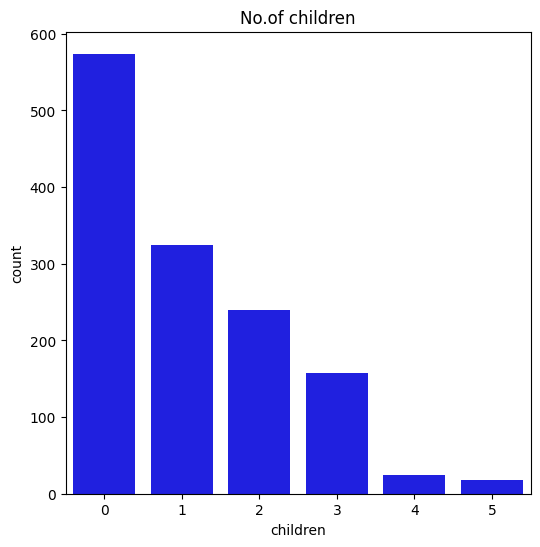

In [6]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df,color="b")
plt.title("No.of children")
plt.show()

<Figure size 600x600 with 0 Axes>

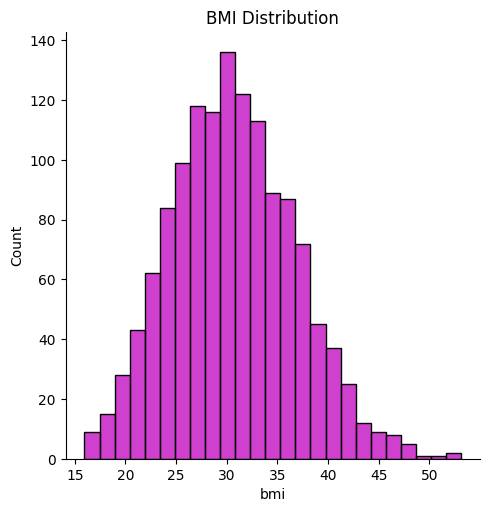

In [7]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'],color="m")
plt.title('BMI Distribution')
plt.show()

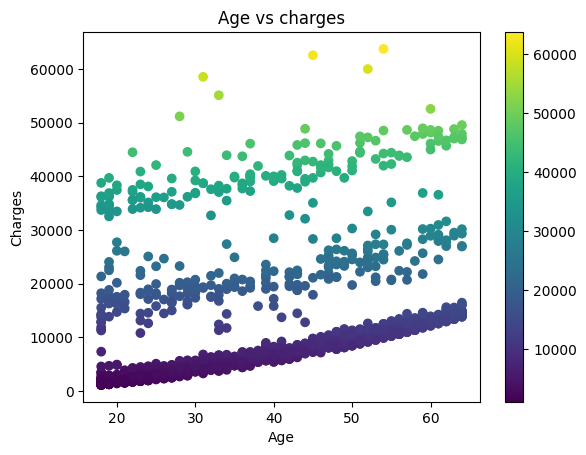

In [8]:
plt.scatter(df["age"],df["charges"],c=df["charges"],cmap="viridis")
plt.colorbar()
plt.title("Age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

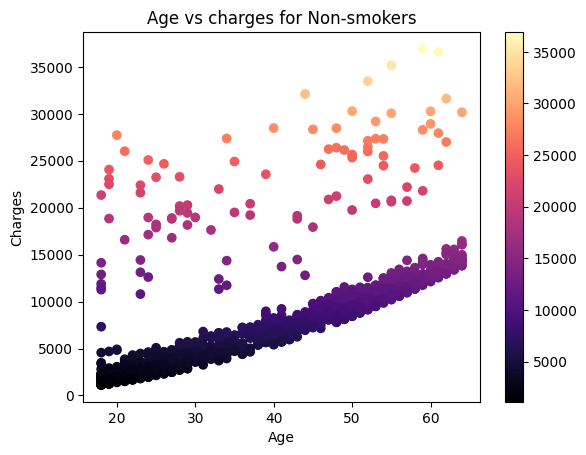

In [9]:
nsm=df[df["smoker"]=="no"]
plt.scatter(nsm["age"],nsm["charges"],c=nsm["charges"],cmap="magma")
plt.colorbar()
plt.title("Age vs charges for Non-smokers")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

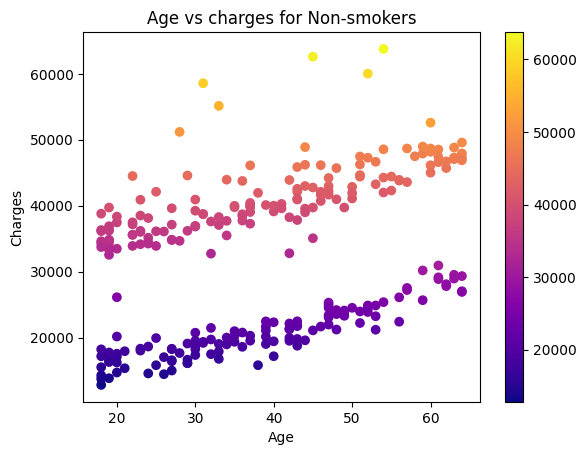

In [10]:
sm=df[df["smoker"]=="yes"]
plt.scatter(sm["age"],sm["charges"],c=sm["charges"],cmap="plasma")
plt.colorbar()
plt.title("Age vs charges for Non-smokers")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker, dtype: int64


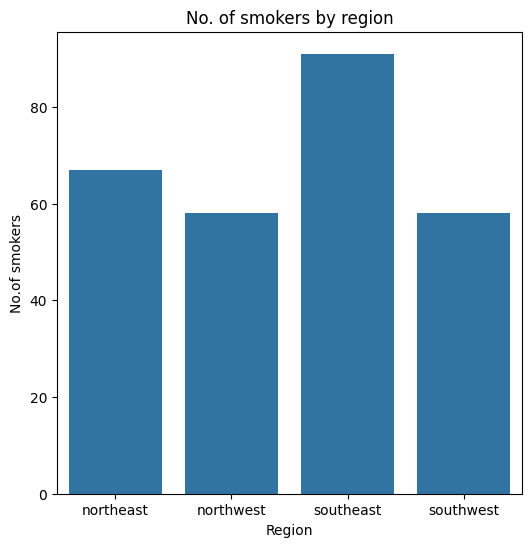

In [11]:
smokers_by_region=df[df["smoker"]=="yes"].groupby("region")["smoker"].count()
print(smokers_by_region)

plt.figure(figsize=(6,6))
# sns.countplot(x="smokers_by_region",data=df)   # countplot takes values from original column not from grouped data
sns.barplot(x=smokers_by_region.index, y=smokers_by_region.values)
plt.xlabel("Region")
plt.ylabel("No.of smokers")
plt.title("No. of smokers by region")
plt.show()

# ENCODING AND DATA PRE-PROCESSING

In [12]:
sex_code={"male":1,"female":0}
smoker_code={"yes":1,"no":0}
df["sex_codes"]=df["sex"].map(sex_code)
df["smoker_codes"]=df["smoker"].map(smoker_code)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_codes,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


# ONE-HOT ENCODING

In [13]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
cn=enc.fit(df[["region"]])
# print(type(cn))
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [14]:
one_hot=enc.transform(df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [15]:
df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

df.head()
# df.to_csv("My_data_set.csv",index=False)

,age,sex,bmi,children,smoker,region,charges,sex_codes,smoker_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


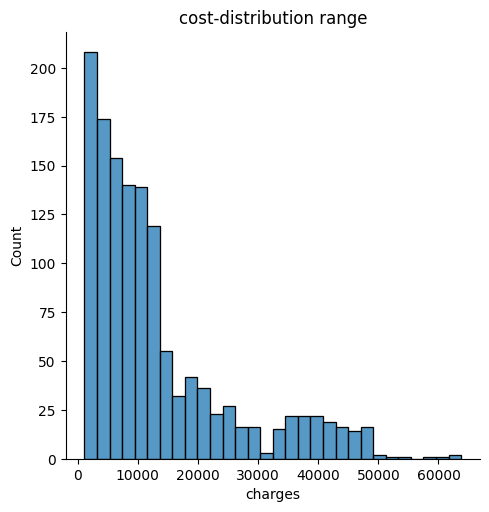

In [16]:
sns.displot(df["charges"])
plt.title("cost-distribution range")
plt.show()


# TRAIN-TEST AND SPLIT 

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['charges','sex','smoker','region'], axis=1) #Drop those columns which are not required for features (nothing to do with charges in features)
Y = df["charges"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 9) (1324, 9) (14, 9)


# MODEL-TRAINING

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

prediction=model.predict(X_test)
prediction

from sklearn import metrics
RMSE=metrics.r2_score(Y_test,prediction)
print(f"RMSE value is {RMSE}\n")

print("The value of slopes are: ",model.coef_)
print("\nThe value of Y-intercept is: ",model.intercept_)

RMSE value is 0.40155482964955225

The value of slopes are:  [  257.30850241   339.46660164   480.7988025   -179.67488255
 23889.31183122   581.95410582   201.73949999  -406.98963519
  -376.70397062]

The value of Y-intercept is:  -12537.153429217156


In [19]:

# PREDECTIVE SYSTEM

user_data=(31,1,25.74,0,1,0,1,0,0)

prediction_usr_data=model.predict([user_data])
# bn=prediction_usr_data.astype(int)
print(f"Estimated price is:- USD {prediction_usr_data[0]}")


Estimated price is:- USD 32245.689254742734


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
